In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_pickle('../junyi_df.pickle')

In [3]:
data['time_done'] = pd.to_datetime(data['time_done'],unit='us')

In [4]:
data.drop(columns=['exercise', 'problem_type', 'problem_number', 'time_taken_attempts', 'hint_time_taken_list'], inplace=True)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925992 entries, 0 to 25925991
Data columns (total 12 columns):
user_id               int64
topic_mode            bool
suggested             bool
review_mode           bool
time_done             datetime64[ns]
time_taken            int64
correct               bool
count_attempts        int64
hint_used             bool
count_hints           int64
earned_proficiency    bool
points_earned         int64
dtypes: bool(6), datetime64[ns](1), int64(5)
memory usage: 1.3 GB


In [6]:
data.columns

Index(['user_id', 'topic_mode', 'suggested', 'review_mode', 'time_done',
       'time_taken', 'correct', 'count_attempts', 'hint_used', 'count_hints',
       'earned_proficiency', 'points_earned'],
      dtype='object')

In [7]:
def change_bool(df, bool_cols):
    for col in bool_cols:
        df[col] = df[col].astype(int)
    return df 

bool_cols = ['topic_mode', 'suggested', 'review_mode','correct', 'hint_used','earned_proficiency',]

data = change_bool(data, bool_cols)

In [8]:
data.describe()

,user_id,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
count,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07,2.592599e+07
mean,1.236557e+05,2.491002e-01,2.054824e-01,2.139050e-02,9.955710e+01,8.278744e-01,1.363888e+00,6.456814e-02,2.850791e-01,4.606570e-02,8.219998e+01
std,7.121600e+04,4.324920e-01,4.040537e-01,1.446822e-01,2.157362e+05,3.774895e-01,2.391150e+00,2.457623e-01,1.276758e+00,2.096274e-01,9.056150e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-5.049212e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.154900e+04,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
50%,1.236270e+05,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+01
75%,1.850520e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.800000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.950000e+02
max,2.476050e+05,1.000000e+00,1.000000e+00,1.000000e+00,4.067572e+08,1.000000e+00,1.000000e+03,1.000000e+00,2.000000e+01,1.000000e+00,2.250000e+02


In [9]:
data['week'] = data['time_done'].dt.week

In [10]:
data.head()

,user_id,topic_mode,suggested,review_mode,time_done,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,week
0,12884,0,0,0,2015-01-08 11:00:10.324490,4,0,2,0,0,0,0,2
1,239464,0,0,0,2014-06-18 13:33:20.836660,2,1,1,0,0,0,14,25
2,147359,0,0,0,2014-12-18 08:18:15.540340,16,1,1,0,0,0,75,51
3,158155,0,0,0,2014-05-19 03:17:24.264040,2,1,1,0,0,0,75,21
4,147151,1,1,0,2013-10-24 21:41:45.730160,4,1,1,0,0,0,225,43


In [11]:
data.groupby(['user_id', 'week']).mean().sort_values(by=['user_id','week'], ascending=[True,True])

,,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
user_id,week,,,,,,,,,,
0,45,0.000000,0.875000,0.000000,18.125000,0.875000,1.250000,0.125000,0.125000,0.000000,196.875000
1,14,0.333333,0.555556,0.000000,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444
2,28,0.589744,0.564103,0.000000,27.102564,0.923077,1.769231,0.076923,0.102564,0.076923,159.000000
3,35,0.005495,0.076923,0.000000,28.752747,0.917582,1.093407,0.016484,0.065934,0.027473,30.032967
4,8,0.000000,0.625000,0.000000,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000
5,23,1.000000,0.572581,0.000000,10.774194,0.846774,1.217742,0.056452,0.056452,0.096774,174.895161
6,48,0.200000,0.600000,0.000000,32.600000,0.800000,1.000000,0.000000,0.000000,0.000000,180.000000
7,43,0.000000,0.000000,0.000000,213.000000,0.000000,1.833333,1.000000,3.166667,0.000000,0.000000
8,26,0.648352,0.527473,0.000000,5.516484,0.835165,1.109890,0.076923,0.494505,0.076923,135.571429


In [12]:
data = (data[(data['time_done']>='1/1/2014')& (data['time_done']<='12/31/2014')])

In [13]:
data.head()

,user_id,topic_mode,suggested,review_mode,time_done,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,week
1,239464,0,0,0,2014-06-18 13:33:20.836660,2,1,1,0,0,0,14,25
2,147359,0,0,0,2014-12-18 08:18:15.540340,16,1,1,0,0,0,75,51
3,158155,0,0,0,2014-05-19 03:17:24.264040,2,1,1,0,0,0,75,21
5,135350,0,1,0,2014-02-19 08:46:32.220080,9,1,1,0,0,0,225,8
6,126493,0,0,0,2014-03-21 01:56:56.571340,19,0,2,0,0,0,0,12


In [14]:
data['user_id'].value_counts().describe()

count    215719.000000
mean        103.097312
std         354.679738
min           1.000000
25%           3.000000
50%          10.000000
75%          52.000000
max       21627.000000
Name: user_id, dtype: float64

In [15]:
total_usage = data['user_id'].value_counts().sort_index()


Text(0, 0.5, 'Number of Users')

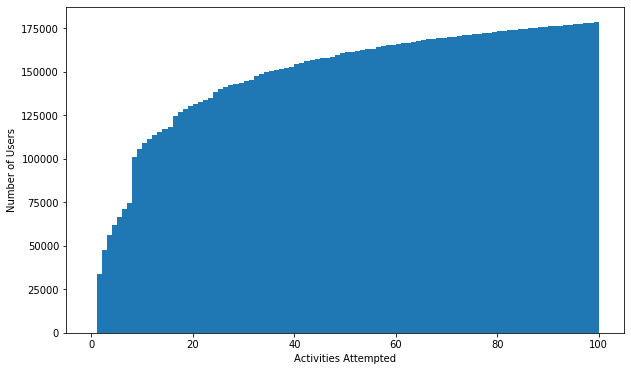

In [93]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(total_usage, bins=100, range=(0,100), histtype='stepfilled', cumulative=True)
ax.set_xlabel('Activities Attempted')
ax.set_ylabel('Number of Users')

In [17]:
len(total_usage)

215719

In [18]:
usage_index = ((total_usage>1))

In [19]:
data[data['user_id']==84690]['time_done'].min()

Timestamp('2014-09-05 02:01:11.427930')

In [20]:
users = data.groupby('user_id')

In [21]:
rng = (users['time_done'].max() - users['time_done'].min()).dt.days

Text(0, 0.5, 'Total Activities Attempted between 1st and Last Activity')

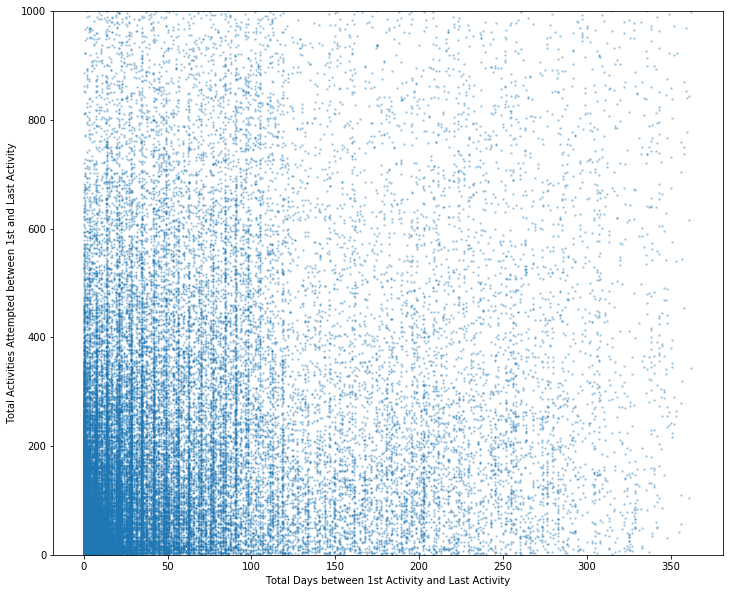

In [97]:
fig, ax = plt.subplots(figsize =(12,10))

ax.scatter(rng, total_usage, s=2, alpha=.3)
ax.set_ylim(0,1000)
ax.set_xlabel('Total Days between 1st Activity and Last Activity')
ax.set_ylabel('Total Activities Attempted between 1st and Last Activity')

In [23]:
len(rng)

215719

Text(0, 0.5, 'Number of Users')

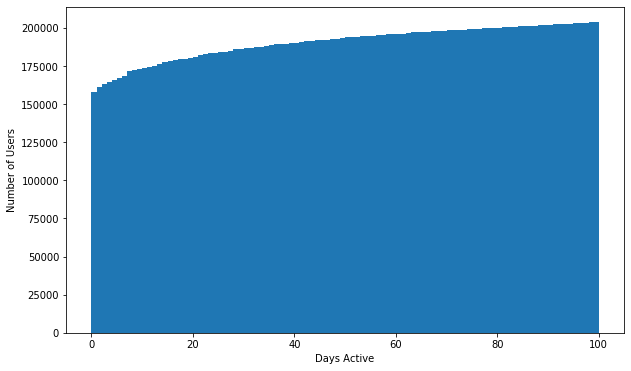

In [99]:
fig, ax = plt.subplots(figsize=(10,6))

ax.hist(rng, bins=100, range=(0,100), histtype='stepfilled', cumulative=True)
ax.set_xlabel('Days Active')
ax.set_ylabel('Number of Users')

In [24]:
rng.describe()

count    215719.000000
mean         17.028987
std          49.257481
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max         363.000000
Name: time_done, dtype: float64

In [25]:
rng[rng>=7].describe()

count    47263.000000
mean        77.067008
std         80.348035
min          7.000000
25%         20.000000
50%         45.000000
75%        102.000000
max        363.000000
Name: time_done, dtype: float64

In [26]:
week_plus_index = rng[rng>7].index

(array([3108., 1930., 1486., 1173., 1032., 1630., 3032.,  956.,  714.,
         694.,  598.,  584., 1042., 1811.,  596.,  470.,  435.,  387.,
         435.,  777., 1469.,  446.,  383.,  330.,  366.,  285.,  683.,
        1068.,  377.,  267.,  270.,  294.,  282.,  487.,  938.,  297.,
         279.,  212.,  227.,  271.,  406.,  728.,  272.,  249.,  227.,
         261.,  249.,  343.,  629.,  240.]),
 array([ 1.  ,  1.98,  2.96,  3.94,  4.92,  5.9 ,  6.88,  7.86,  8.84,
         9.82, 10.8 , 11.78, 12.76, 13.74, 14.72, 15.7 , 16.68, 17.66,
        18.64, 19.62, 20.6 , 21.58, 22.56, 23.54, 24.52, 25.5 , 26.48,
        27.46, 28.44, 29.42, 30.4 , 31.38, 32.36, 33.34, 34.32, 35.3 ,
        36.28, 37.26, 38.24, 39.22, 40.2 , 41.18, 42.16, 43.14, 44.12,
        45.1 , 46.08, 47.06, 48.04, 49.02, 50.  ]),
 <a list of 50 Patch objects>)

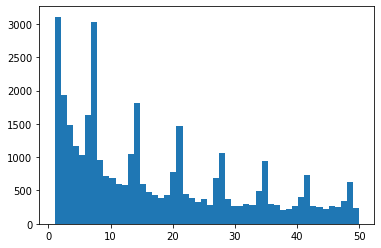

In [27]:
plt.hist(rng[usage_index], bins=50, range=(1,50)) 

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22240049 entries, 1 to 25925991
Data columns (total 13 columns):
user_id               int64
topic_mode            int64
suggested             int64
review_mode           int64
time_done             datetime64[ns]
time_taken            int64
correct               int64
count_attempts        int64
hint_used             int64
count_hints           int64
earned_proficiency    int64
points_earned         int64
week                  int64
dtypes: datetime64[ns](1), int64(12)
memory usage: 2.3 GB


In [29]:
usage = data.groupby(['user_id']).mean().sort_values(by=['user_id'], ascending=[True])

In [30]:
usage_by_week = data.groupby(['user_id', 'week']).mean().sort_values(by=['user_id','week'], ascending=[True,True])

In [31]:
usage_by_week.head()

,,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned
user_id,week,,,,,,,,,,
0,45,0.000000,0.875000,0.0,18.125000,0.875000,1.250000,0.125000,0.125000,0.000000,196.875000
1,14,0.333333,0.555556,0.0,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444
2,28,0.589744,0.564103,0.0,27.102564,0.923077,1.769231,0.076923,0.102564,0.076923,159.000000
3,35,0.005495,0.076923,0.0,28.752747,0.917582,1.093407,0.016484,0.065934,0.027473,30.032967
4,8,0.000000,0.625000,0.0,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000


In [32]:
cut_off = pd.datetime(2014, 6, 30)

In [33]:
predictor = users['time_done'].max() > cut_off

In [34]:
users_ids = users['time_done'].min() < cut_off

In [35]:
predictor[0:10]

user_id
0     True
1    False
2     True
3     True
4    False
5    False
6     True
7     True
8     True
9     True
Name: time_done, dtype: bool

In [36]:
target = predictor[users_ids].astype(int)

In [37]:
users_ids == True

user_id
0         False
1          True
2         False
3         False
4          True
5          True
6         False
7         False
8          True
9          True
10        False
11        False
12        False
13         True
14        False
15         True
16         True
17        False
19        False
20        False
21        False
22        False
23        False
24        False
25        False
26         True
27        False
28        False
29         True
30        False
          ...  
247574    False
247575    False
247576    False
247577    False
247578     True
247579     True
247580     True
247581     True
247582    False
247583    False
247584    False
247585    False
247586    False
247587    False
247589     True
247590    False
247591     True
247592    False
247594    False
247595    False
247596    False
247597    False
247598    False
247599     True
247600    False
247601    False
247602     True
247603    False
247604    False
247605    False
Name: time_done,

In [38]:
predictor.sum()

144114

In [39]:
len(target)

81714

In [40]:
len(predictor)

215719

In [41]:
#data[]

SyntaxError: invalid syntax (<ipython-input-41-1527323af517>, line 1)

In [42]:
rng = (users['time_done'].max() - users['time_done'].min()).dt.days

In [43]:
#<= cut_off

In [44]:
new_data = (data[(data['time_done']>='1/1/2014')& (data['time_done']<='6/30/2014')])

In [45]:
new_data.head()

def get_active_weeks(user_id):
    try: 
        return len(set(new_data.loc[user_id, 'week']))
    except:
        return 0

In [46]:
new_data.set_index('user_id', inplace=True)

In [47]:
new_data.index.values

array([239464, 158155, 135350, ..., 242580, 113514,  84219])

In [48]:
get_active_weeks(52)

11

In [68]:
days_before_cutoff = pd.datetime(2014,6,30) - new_data['time_done'] 

In [69]:
days_before_cutoff.head(25)

user_id
239464    11 days 10:26:39.163340
158155    41 days 20:42:35.735960
135350   130 days 15:13:27.779920
126493   100 days 22:03:03.428660
24158     87 days 07:15:26.505720
91712     95 days 19:18:35.721390
13719    115 days 14:29:21.541040
235764    72 days 16:27:34.472280
87576     68 days 20:41:05.044670
224454    76 days 15:43:09.608600
127359     0 days 11:19:17.947600
244490    61 days 09:24:53.624380
41750    110 days 07:24:22.751270
52539     33 days 20:24:02.205460
43131     58 days 17:06:57.643600
103939   115 days 15:32:56.511500
206087    30 days 09:07:54.173470
64309     41 days 15:04:37.903350
89349     33 days 12:01:29.865670
68679     14 days 19:49:59.098980
4668     141 days 11:53:07.521960
212759   100 days 20:49:42.768580
38355    163 days 20:52:28.971840
151341   159 days 14:02:28.588400
235987    72 days 21:53:29.837330
Name: time_done, dtype: timedelta64[ns]

In [72]:
new_data['days_before_cutoff'] = days_before_cutoff.dt.days 

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
new_data.head()

,topic_mode,suggested,review_mode,time_done,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,week,days_before_cutoff
user_id,,,,,,,,,,,,,
239464,0,0,0,2014-06-18 13:33:20.836660,2,1,1,0,0,0,14,25,11
158155,0,0,0,2014-05-19 03:17:24.264040,2,1,1,0,0,0,75,21,41
135350,0,1,0,2014-02-19 08:46:32.220080,9,1,1,0,0,0,225,8,130
126493,0,0,0,2014-03-21 01:56:56.571340,19,0,2,0,0,0,0,12,100
24158,0,0,0,2014-04-03 16:44:33.494280,4,1,1,0,0,0,12,14,87


In [78]:
#froze the machine! 
# activity30 = {}

# for user in new_data.index.values:
#     activity30[user] =  new_data.loc[user, 'days_before_cutoff'].min() > 30

KeyboardInterrupt: 

In [ ]:
# earliest_activity = {}
# for user in new_data.index.values:
#     last_activity[user] =  new_data.loc[user, 'days_before_cutoff'].max()

In [76]:
new_data.loc[52, 'days_before_cutoff'].max()

173

In [58]:
users_data = new_data.groupby('user_id')

In [62]:
activity_count = users_data['time_done'].count()

,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,week
user_id,,,,,,,,,,,
1,9,15,0,398,20,42,2,14,2,3819,378
4,0,5,0,62,8,8,0,0,1,1164,64
5,124,71,0,1336,105,151,7,7,12,21687,2852
8,59,48,0,502,76,101,7,45,7,12337,2366
9,31,19,0,1139,52,122,5,9,2,9412,1768
13,1,1,0,19,1,1,0,0,0,225,26
15,0,0,0,4,1,1,0,0,0,75,22
16,8,0,0,3106,21,26,2,3,1,1876,168
26,0,0,0,14,2,2,0,0,0,150,6


In [49]:
# days_active = dict()
# for user_id in set(new_data.index.values):
#     days_active[user_id] = get_active_weeks(user_id)

In [50]:
# users_data['weeks_active'] = pd.Series(days_active)

In [52]:

#len(users_data)

In [79]:
user_table = pd.DataFrame(users_data.mean())

In [55]:
len(new_data)

9707597

In [56]:
#user_table.drop(columns='week', inplace=True)

NameError: name 'user_table' is not defined

In [ ]:
#user_table.head()

In [ ]:
# random_calculation = {1:990, 2:373, 3:91, 4:55}

# user_table['test'] = pd.Series(random_calculation)
# user_table.head()

In [ ]:
target.head()

In [81]:
user_table['activity_count'] = activity_count

In [82]:
user_table.head()

,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,week,days_before_cutoff,activity_count
user_id,,,,,,,,,,,,,
1,0.333333,0.555556,0.0,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444,14.0,87.0,27
4,0.000000,0.625000,0.0,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000,8.0,130.0,8
5,1.000000,0.572581,0.0,10.774194,0.846774,1.217742,0.056452,0.056452,0.096774,174.895161,23.0,25.0,124
8,0.648352,0.527473,0.0,5.516484,0.835165,1.109890,0.076923,0.494505,0.076923,135.571429,26.0,3.0,91
9,0.455882,0.279412,0.0,16.750000,0.764706,1.794118,0.073529,0.132353,0.029412,138.411765,26.0,5.0,68


In [83]:
user_table['target'] = target

In [88]:
user_table.drop(columns='week', inplace=True)

In [89]:
user_table.head()

,topic_mode,suggested,review_mode,time_taken,correct,count_attempts,hint_used,count_hints,earned_proficiency,points_earned,days_before_cutoff,activity_count,target
user_id,,,,,,,,,,,,,
1,0.333333,0.555556,0.0,14.740741,0.740741,1.555556,0.074074,0.518519,0.074074,141.444444,87.0,27,0
4,0.000000,0.625000,0.0,7.750000,1.000000,1.000000,0.000000,0.000000,0.125000,145.500000,130.0,8,0
5,1.000000,0.572581,0.0,10.774194,0.846774,1.217742,0.056452,0.056452,0.096774,174.895161,25.0,124,0
8,0.648352,0.527473,0.0,5.516484,0.835165,1.109890,0.076923,0.494505,0.076923,135.571429,3.0,91,1
9,0.455882,0.279412,0.0,16.750000,0.764706,1.794118,0.073529,0.132353,0.029412,138.411765,5.0,68,1


In [90]:
pd.to_pickle(user_table, '../user_table.pickle')

In [ ]:
#users.mean()

In [ ]:
usage_weeks = new_data[['user_id','week']].set_index['user_id']

In [ ]:
usage_weeks.head(50)

In [ ]:
usagebyw = new_data.groupby(['user_id', 'week']).mean().sort_values(by=[user_id','week'], ascending=[True,True])

In [ ]:
usagebyw.head(20)

In [ ]:
t= pd.DataFrame(usagebyw.loc[52,:].values.flatten()).T

In [ ]:
t

In [ ]:
usagebyw.pivot

In [ ]:
t2= pd.DataFrame(usagebyw.loc[8,:].values.flatten()).T

In [ ]:
pd.concat([t,t2])

In [ ]:
tester = usagebyw.head(150)

In [ ]:

final = pd.DataFrame()

for user, week in tester.index:
    new = pd.DataFrame(usagebyw.loc[user,:].values.flatten(), columns=[user])
    final = pd.concat([final,new], axis=1)
    
    

In [ ]:
final

In [ ]:
usagebyw

In [ ]:
# final = pd.DataFrame()

# for user, week in usagebyw.index:
#     new = pd.DataFrame(usagebyw.loc[user,:].values.flatten(), columns=[user])
#     final = pd.concat([final,new], axis=1)
    
# final.fillna(0) 
